# **Namespaces and Decorators**

## Namespaces 

A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

There are 4 types of namespaces:
- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace

### Scope 
A scope is a textual region of a Python program where a namespace is directly accessible.

### LEGB rule : Local Enclosing Global Builtin
The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.

In [1]:
# local and global

# global variable
a = 2

def temp():
  # local variable
  b = 3
  print(b)

temp()
print(a)

3
2


![Screenshot 2024-08-28 at 13-13-25 Python Tutor code visualizer Visualize code in Python JavaScript C C and Java.png](<attachment:Screenshot 2024-08-28 at 13-13-25 Python Tutor code visualizer Visualize code in Python JavaScript C C and Java.png>)
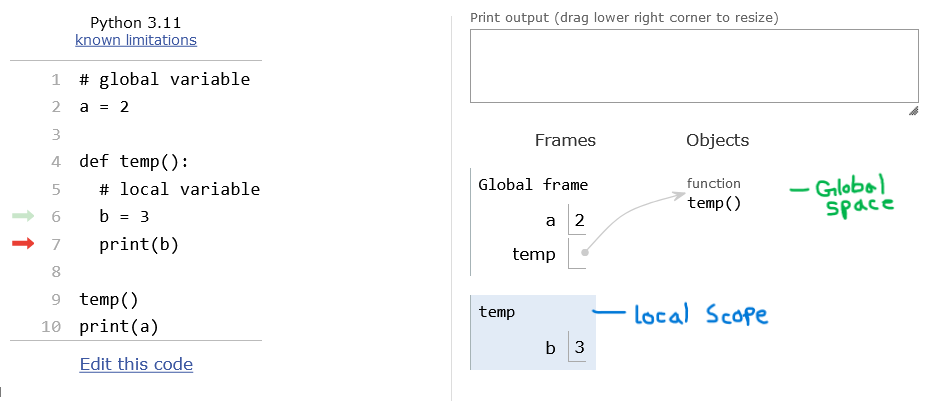

In [2]:
# local and global -> same name
a = 2

def temp():
  # local var
  a = 3
  print(a)

temp()
print(a)

3
2


In [4]:
# local and global -> local does not have but global has
a = 2

def temp():
  # local var
  print(a)  # if in local do not find then python interpreter find on global space

temp()
print(a)

2
2


In [5]:
# you cannot edit a grobal variable of global spcae from a local a space.
a = 2

def temp():
  # local var
  a += 1
  print(a)

temp()
print(a)

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

In [7]:
a = 2

def temp():
  # local var
  global a # python give this option (`global` keyword) to edit global from the local
  a += 1
  print(a)

temp()
print(a)

3
3


In [8]:
# local and global -> global created inside local
def temp():
  global a
  # a is create in global space
  a = 1
  print(a)

temp()
print(a)

1
1


In [10]:
# local and global ->Any function parameter is local variable
def temp(z):
  # local var
  print(z)

a = 5
temp(5)
print(a)
# print(z) : you cannot acces z from global space

5
5


In [12]:
# built-in scope : print, type, int, min, max, sorted, upper all this python functions are builtin scope

# local -> Global -> Biltin

import builtins
print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BaseExceptionGroup', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'ExceptionGroup', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'S

In [14]:
# renaming built-ins
L = [1,2,3]
print(max(L))
def max():
  print('hello')

print(max(L))
# Basicaly you renamed a builtin variable in global variable. Thats why there global functionality only work for that function/variable . max()

# Basically you find something in the order of
# local -> Enclose -> Global -> Builtin
# if Any of space requirment function or variable is found then it stop . Like you finding something at first find in local space -(not fount) -> then Enclose (not found) -> then Global (found) ; you will stop . you will not go to next -> builtin now

TypeError: max() takes 0 positional arguments but 1 was given

In [15]:
# Enclosing scope : Enclosing scope is basiclly you see inside nested function. Function under function is called enclosing scope

def outer():
    def inner():
        print('inner function')
    inner()
    print('outer function')
outer()
print('main program')

inner function
outer function
main program


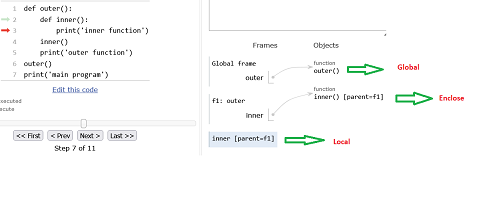

In [18]:

def outer():
  def inner():
    a = 4
    print(a)
  inner()
  print('outer function')


outer()
print('main program')

# LEGB

4
outer function
main program


In [19]:
# you can change of outer function from inner function space
def outer():
  a = 1
  def inner():
    nonlocal a
    a += 1
    print('inner',a)
  inner()
  print('outer',a)


outer()
print('main program')

inner 2
outer 2
main program


# Decorators

A decorator in python is a function that receives another function as input and adds some functionality(decoration) to it and returns it. In simple term Decorator is a function(f1) which take input as an another function(f2). The decorator(f1) is basicaly add some functionality to input function(f2).(add some decoration on f2). Then return it. And decorator is symbolized by `@`

This can happen only because python functions are 1st class citizens.

The speciality of decorator  is after die parent function,  child function also access parent function functionality



> There are 2 types of decorators available in python
- `Built in decorators` like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- `User defined decorators` that we programmers can create according to our needs

In [20]:
# In python fucntions are 1st class citizen
def func():
    print('hello')

a = func # a is now a function
a()

hello


In [22]:
# You giving a function as input to a another function 
def modify(func, num):
    return func(num)

def square(num):
    return num**2
modify(square, 3)

9

In [27]:
# Simple example
# how this works -> closure? See this code snipet on python tutor visualization

def my_decorator(func):
    def wrapper():
        print('*'*20)
        func()
        print('*'*20)
    
    return wrapper

def hello():
    print('Hello')

a = my_decorator(hello)
a()

********************
Hello
********************


In [28]:
# Better syntax ? This is t
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

@my_decorator # this is original way of decorator
def hello():
  print('hello')

hello() # for using dector while creating hello function decorator automatically execute

***********************
hello
***********************


In [34]:
def love_decorator(func):
    def wrapper():
        print('I love You')
        func()
        print('Do you marry me ?')
    return wrapper


@love_decorator
def my_love():
    name = input('Enter your name please :')
    print(name)

my_love()

I love You
Tanisha
Do you marry me ?


In [40]:
# We will create a decorator which will print execution time of any function

import time

def timer(func):
    def wrapper():
        start = time.time()
        func()
        print('Time taken by ', func.__name__, time.time() - start, 'secs')

    return wrapper

@timer
def hello():
    print('Hello world')
    time.sleep(2)

@timer
def square(num):
    print('sleeping _')
    time.sleep(1)
    return num**2

hello()
square(2) # this code is broked becacuse in this kind of code wrapper function asking for input. But there not input is given . So how can you make it generic > *args

Hello world
Time taken by  hello 2.0006494522094727 secs


TypeError: timer.<locals>.wrapper() takes 0 positional arguments but 1 was given

In [41]:
# anything meaningful?
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func(*args)
    print('time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('hello world')
  time.sleep(2)

@timer
def square(num):
  time.sleep(1)
  print(num**2)

@timer
def power(a,b):
  print(a**b)

hello()
square(2)
power(2,3)


hello wolrd
time taken by hello 2.00105619430542 secs
4
time taken by square 1.00065279006958 secs
8
time taken by power 0.0 secs


In [ ]:
# One last example -> decorators with arguments : skipped 12 sess 1:40

In [ ]:
@checkdt(int)
def square(num):
  print(num**2)

In [ ]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('Ye datatype nai chalega')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

@sanity_check(str)
def greet(name):
  print('hello',name)

square(2)

4
